In [33]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [34]:
def crect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

# A rectangle is (start, width)
# A list element is (-weight, (start, width))

def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)
    

def get_max_elem(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # find the max element
    elem = max(lst, key=key)
    
    # find its position in the list
    idx = lst.index(elem)
    
    return elem, lst[:idx] + lst[idx+1:]

    
def adapt_rect_list(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst, lambda x: -x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst

In [48]:
def f(x):
    return np.exp(-x)
a, b = 0, 20

def L(a, b):
    return (-np.exp(-b)+np.exp(-a))

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list(f, a, b, n)
    print ('n, res = ', n, res)

n, res =  5 0.9552698388347781
n, res =  25 0.9786718962428081
n, res =  125 0.9956502001607699
n, res =  250 0.9959491604791242
n, res =  500 0.9960027891786778
n, res =  1000 0.9997391610745809
n, res =  5000 0.999940521244624


In [36]:
%timeit adapt_rect_list(f, a, b, npts=1000)

78.2 ms ± 833 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


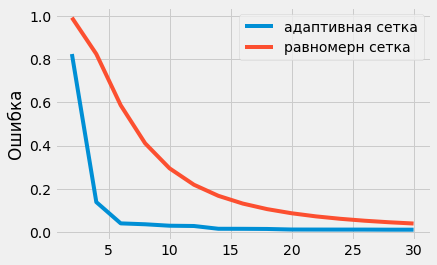

In [55]:
res1 = []
res2 = []
a, b = 0, 30

rng = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
#rng = [1,2,3,4,5,6,7,8,9,10]

for k in rng:
    res1.append(abs(adapt_rect_list(f,a,b,k)[0]-L(a,b)))
    res2.append(abs(crect(f,a,b,k)-L(a,b)))

plt.plot(rng,res1,label = 'адаптивная сетка')
plt.plot(rng,res2,label = 'равномерн сетка')
plt.ylabel('Ошибка')
plt.legend()